In [185]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
import warnings
warnings.filterwarnings('ignore')

In [143]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 30

In [23]:
ds = tf.keras.preprocessing.image_dataset_from_directory("data", image_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size=BATCH)

Found 2152 files belonging to 3 classes.


In [162]:
class_names = ds.class_names

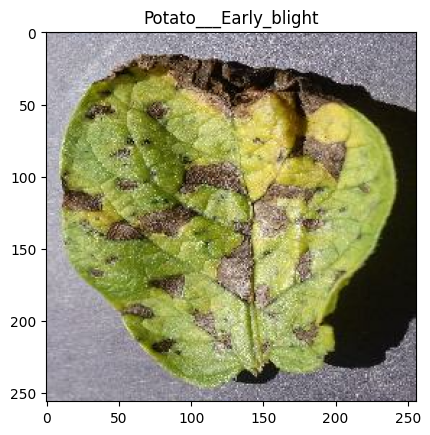

In [170]:
image = ds.as_numpy_iterator().next()

plt.imshow(image[0][0].astype(int))
plt.title(class_names[image[1][0]])
plt.show()

In [6]:
len(ds)

68

In [7]:
train_size = int(len(ds) * 0.7)
val_size = int(len(ds) * 0.2) + 1
test_size = int(len(ds) * 0.1) + 1

In [8]:
test_size

7

In [9]:
train_ds = ds.take(train_size)
val_ds = ds.skip(train_size).take(val_size)
test_ds = ds.skip(train_size + val_size)

In [10]:
len(test_ds)

7

In [11]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [12]:
resize_and_scale = Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1./255)
])

In [13]:
data_augmentation = Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [144]:
INPUT_SHAPE = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

model = Sequential()

model.add(resize_and_scale)
model.add(data_augmentation)

model.add(Conv2D(32, (3,3), activation="relu", input_shape=INPUT_SHAPE))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(64, activation="relu"))
model.add(Dense(3, activation="softmax"))

model.build(input_shape=INPUT_SHAPE)

model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d_89 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_89 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_90 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_90 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                

In [145]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [146]:
history = model.fit(train_ds, validation_data=val_ds, epochs=EPOCHS, batch_size=BATCH_SIZE)

Epoch 1/30
47/47 [==============================] - 9s 142ms/step - loss: 0.9234 - accuracy: 0.4774 - val_loss: 0.8361 - val_accuracy: 0.4665
Epoch 2/30
47/47 [==============================] - 7s 140ms/step - loss: 0.7238 - accuracy: 0.6616 - val_loss: 0.4869 - val_accuracy: 0.7969
Epoch 3/30
47/47 [==============================] - 7s 139ms/step - loss: 0.4586 - accuracy: 0.8025 - val_loss: 0.3338 - val_accuracy: 0.8638
Epoch 4/30
47/47 [==============================] - 7s 140ms/step - loss: 0.3334 - accuracy: 0.8684 - val_loss: 0.3099 - val_accuracy: 0.8750
Epoch 5/30
47/47 [==============================] - 7s 139ms/step - loss: 0.3308 - accuracy: 0.8657 - val_loss: 0.3005 - val_accuracy: 0.8817
Epoch 6/30
47/47 [==============================] - 7s 139ms/step - loss: 0.2619 - accuracy: 0.8949 - val_loss: 0.2269 - val_accuracy: 0.8929
Epoch 7/30
47/47 [==============================] - 7s 139ms/step - loss: 0.2423 - accuracy: 0.9049 - val_loss: 0.3426 - val_accuracy: 0.8549
Epoch 

In [152]:
model.evaluate(test_ds)

7/7 [==============================] - 0s 21ms/step - loss: 0.0322 - accuracy: 0.9850


[0.03223874792456627, 0.9850000143051147]

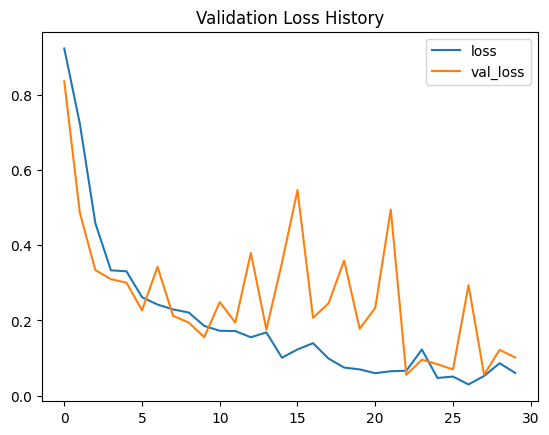

In [150]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.title("Validation Loss History")
plt.legend()
plt.show()

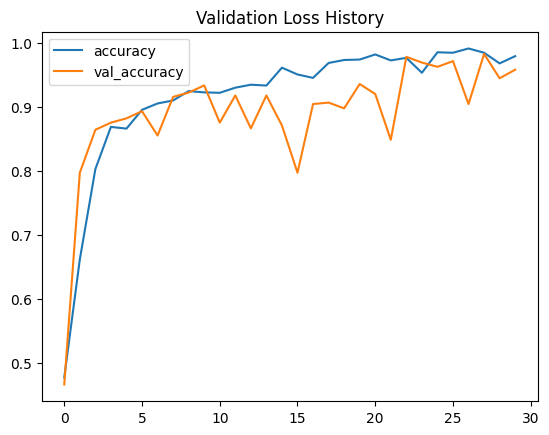

In [151]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.title("Validation Loss History")
plt.legend()
plt.show()

In [179]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch(model expects a batch of images)
    
    pred = model.predict(img_array)
    pred_class = class_names[np.argmax(pred[0])]

    confidence = round(100 * (np.max(pred[0])), 2)

    return pred_class, confidence  

1/1 [==============================] - 0s 18ms/step


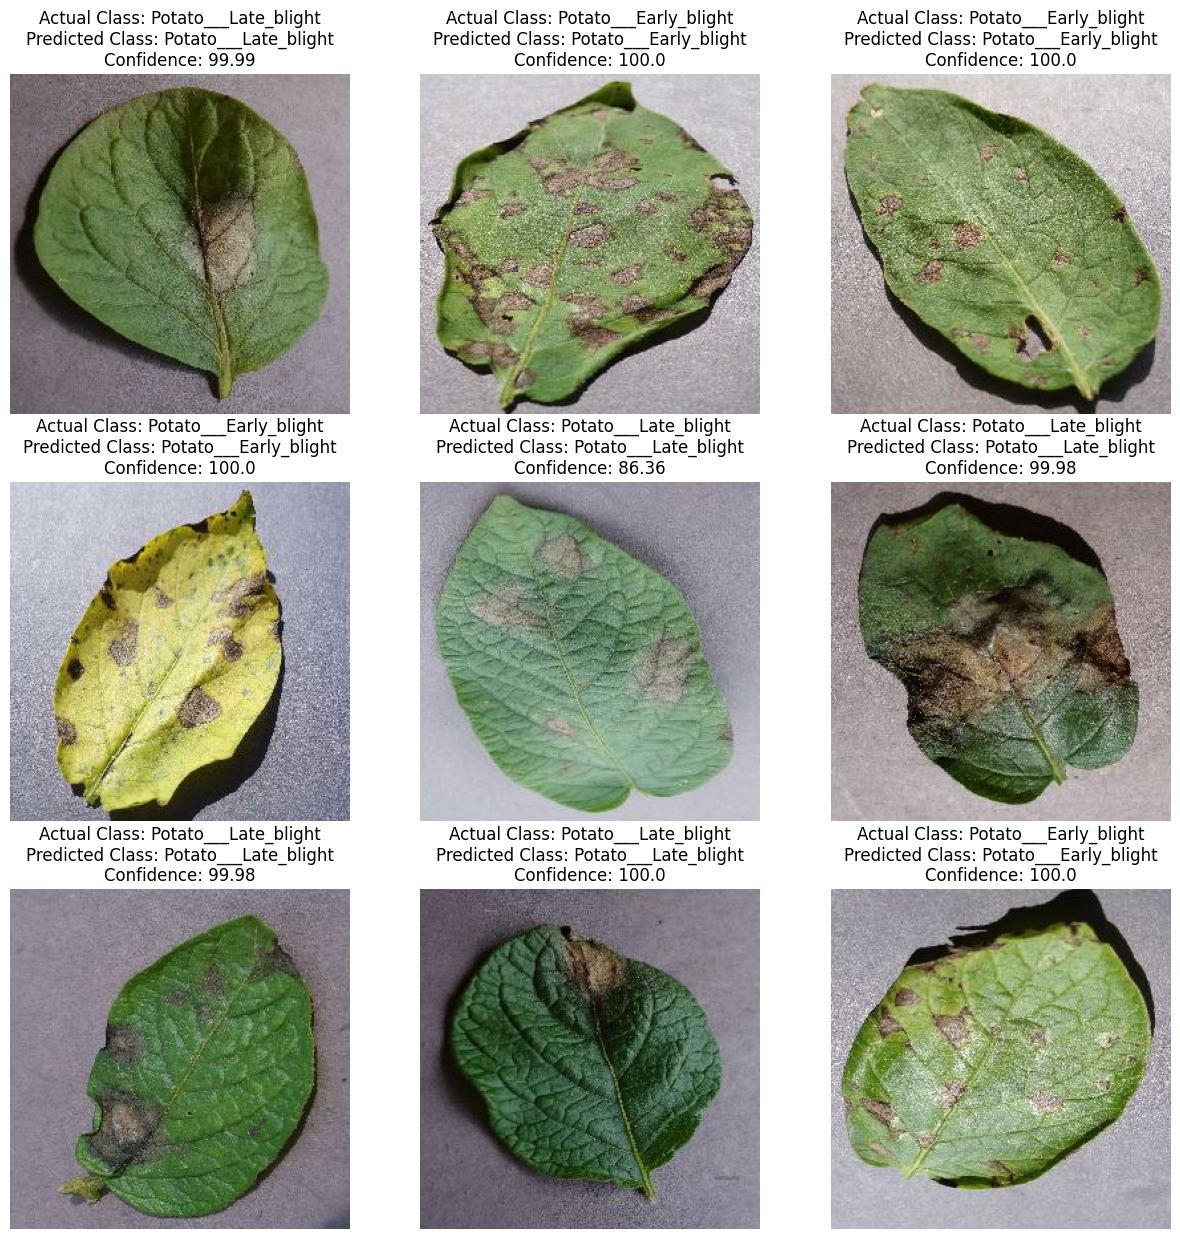

In [182]:
fig = plt.figure(figsize=(15,15))
for image, label in test_ds.take(1):
    for i in range(9):
        pred_class, confidence = predict(model, image[i].numpy())
        actual_class = class_names[label[i]]
        
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(image[i].numpy().astype(int))
        plt.axis("off")
        plt.title(f"Actual Class: {actual_class}\nPredicted Class: {pred_class}\nConfidence: {confidence}")
        

In [186]:
model_version = 1
model.save(f"models/{model_version}")

INFO:tensorflow:Assets written to: models/1\assets


INFO:tensorflow:Assets written to: models/1\assets
